Task-2

•	Write a procedure that determines that maximum (positive, negative) maximum or minimum degree of a given signed graph.

 The degree of a vertex in a graph is the number of edges incident to that vertex. The positive degree of a vertex is the number of positive edges incident to it, while the negative degree is the number of negative edges incident to it. The maximum (positive/negative) degree is the highest positive/negative degree among all vertices, and the minimum degree is the smallest degree overall.

In [2]:
from itertools import combinations
import random
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
import time
from datetime import timedelta

In [10]:
def parse_signed_graph_file(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            vertex1, vertex2, sign = line.split()
            vertex1 = int(vertex1)
            vertex2 = int(vertex2)
            sign = int(sign)
            if vertex1 not in graph:
                graph[vertex1] = []
            if vertex2 not in graph:
                graph[vertex2] = []
            graph[vertex1].append(sign)
            graph[vertex2].append(sign)  # Add the opposite sign for the other vertex
    return graph

def preparing_graph_to_visualize(file_path):
    Grp = nx.Graph()
    graph_list = list()
    with open(file_path, 'r') as file:
        for line in file:
            source, target, weight = map(int, line.strip().split())
            val = (source, target, {'sign':weight})
            graph_list.append(val)
            
    Grp.add_edges_from(graph_list)
    return Grp


def visualize_signed_graph(G):

    # Visualize the graph with positive edges in green and negative edges in red
    
    pos = nx.spring_layout(G)
    positive_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == 1]
    negative_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == -1]

    plt.figure(figsize=(10,6))

    nx.draw_networkx_nodes(G, pos, nodelist = list(G.nodes()), node_color="white", node_size=500, edgecolors='black', linewidths=1.0)
    nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='green')
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='red')
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    
    plt.plot([0], color='green', label='Positive Connection')
    plt.plot([0], color='red', label='Negative Connection')

    # Adding legend
    plt.legend()

    plt.title("Original Graph")
    plt.tight_layout()


    plt.show()

In [11]:
def compute_signed_graph_degrees(graph):
    # Initialize variables to track maximum and minimum degrees
    max_positive_degree = 0
    max_negative_degree = 0
    min_degree = float('inf')
    max_degree = 0

    for vertex, neighbors in graph.items():
        # Initialize variables to count positive and negative degrees of the current vertex
        positive_degree = 0
        negative_degree = 0

        for neighbor in neighbors:
            # Count positive and negative edges
            if neighbor > 0:
                positive_degree += 1
            elif neighbor < 0:
                negative_degree += 1

        # Update maximum (positive/negative) degree if necessary
        max_positive_degree = max(max_positive_degree, positive_degree)
        max_negative_degree = max(max_negative_degree, negative_degree)

        # Update minimum degree if necessary
        total_degree = positive_degree + negative_degree
        min_degree = min(min_degree, total_degree)
        max_degree = max(max_degree,  total_degree)

    return max_positive_degree, max_negative_degree, min_degree, max_degree

Maximum positive degree: 40
Maximum negative degree: 30
Minimum degree: 1
Maximum degree: 50


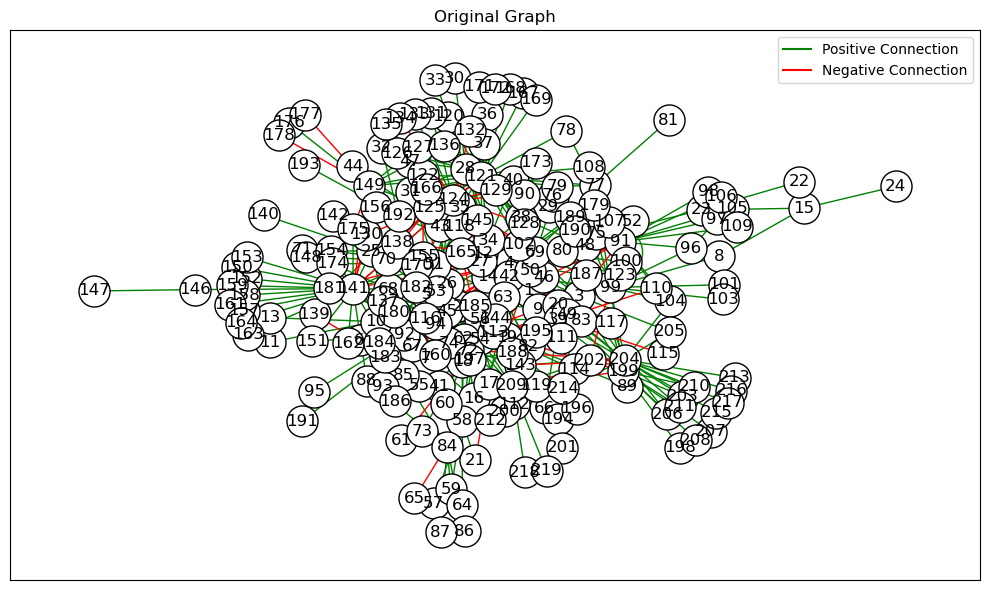

Total time taken: 0:00:00.917711


In [17]:
# Example usage:
# start recording performance timing
start_time = time.monotonic()

# taking the given example file
file_path = r"/Users/mac/Desktop/Desktop/RCS_Signed_Graph/Meeting_1/graph_test_files/convote.txt"

# converting the file to readable dictionary format for further usage
graph = parse_signed_graph_file(file_path)

# finding positive and negative degree's minimum and maximum
max_pos_deg, max_neg_deg, min_deg, max_deg = compute_signed_graph_degrees(graph)
print("Maximum positive degree:", max_pos_deg)
print("Maximum negative degree:", max_neg_deg)
print("Minimum degree:", min_deg)
print("Maximum degree:", max_deg)

# converting the file into a Graph structure to visualize
G = preparing_graph_to_visualize(file_path)

# visualizing the graph
visualize_signed_graph(G)

# end recording performance timing
end_time = time.monotonic()
print("Total time taken:",timedelta(seconds=end_time - start_time))